In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import script.func as func



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhmadramadani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akhmadramadani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akhmadramadani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load the data
df = pd.read_csv('data/collegemenfess.csv')
df.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1603569991151804417,1603569991151804417,2022-12-16 08:57:33 WIB,2022-12-16,08:57:33,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1603569910097285120,1603569910097285120,2022-12-16 08:57:14 WIB,2022-12-16,08:57:14,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1603569275658448896,1603569275658448896,2022-12-16 08:54:42 WIB,2022-12-16,08:54:42,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1603569076390924289,1603569076390924289,2022-12-16 08:53:55 WIB,2022-12-16,08:53:55,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1603568860145528832,1603568860145528832,2022-12-16 08:53:03 WIB,2022-12-16,08:53:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
# get only tweet column
df = df[['tweet']]
df['real_tweet'] = df['tweet']
df.head()

,tweet,real_tweet
0,[cm] smt 5 mending ikut studi independen dulu ...,[cm] smt 5 mending ikut studi independen dulu ...
1,[cm] di kampus kalian mahasiswa s1 wajib publi...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,[CM] Dosen praktikum aku ngasih ini waktu pert...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,[cm] Alhamdulilah masih bisa hidup walaupun di...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [4]:
# clean the data
df['tweet'] = df['tweet'].apply(func.cleanTxt)
df.head()

,tweet,real_tweet
0,smt mending ikut studi independen dulu apa ...,[cm] smt 5 mending ikut studi independen dulu ...
1,di kampus kalian mahasiswa s wajib publish j...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,bisa gk yh tugas uas ini ngerjain dirinya sen...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum aku ngasih ini waktu pertemua...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah masih bisa hidup walaupun dikasi...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [5]:
# slang to formal
df['tweet'] = df['tweet'].apply(func.slang_to_formal)
df.head()

,tweet,real_tweet
0,semester lebih baik ikut studi independen dulu...,[cm] smt 5 mending ikut studi independen dulu ...
1,di kampus kalian mahasiswa s wajib publish jur...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,bisa tidak iya tugas uas ini mengerjakan dirin...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum saya kasih ini waktu pertemuan...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah masih bisa hidup walaupun dikasi ...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [6]:
# acronym to formal
df['tweet'] = df['tweet'].apply(func.acronym_to_formal)
df.head()


,tweet,real_tweet
0,semester lebih baik ikut studi independen dulu...,[cm] smt 5 mending ikut studi independen dulu ...
1,di kampus kalian mahasiswa s wajib publish jur...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,bisa tidak iya tugas uas ini mengerjakan dirin...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum saya kasih ini waktu pertemuan...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah masih bisa hidup walaupun dikasi ...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [7]:
# remove stopword
df['tweet'] = df['tweet'].apply(func.removeStopWords)
df.head()

,tweet,real_tweet
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...
1,kampus mahasiswa wajib publish jurnal terindek...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum kasih waktu pertemuan kelas te...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah hidup dikasi include kos kuliah j...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [8]:
# stemming
df['tweet'] = df['tweet'].apply(func.stemSentence)
df.head()

,tweet,real_tweet
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [9]:
# tokenization
df['token'] = df['tweet'].apply(func.word_tokenize)
df.head()

,tweet,real_tweet,token
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]"
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ..."
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [10]:
# remove empty tweet
df = df[df['token'].apply(len) > 0]
df.head()

,tweet,real_tweet,token
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]"
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ..."
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [11]:
def get_vector(text):
    vector = np.zeros(100)
    for word in text:
        vector += model.wv[word]
    return vector/len(text)


In [12]:
# Vectorization using Word2Vec
from gensim.models import Word2Vec
model = Word2Vec(df['token'], min_count=1)

# get vector
df['vector'] = df['token'].apply(get_vector)
df.head()


,tweet,real_tweet,token,vector
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem...","[-0.4777812850661576, 0.731285504065454, 0.182..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...","[-0.3680373860730065, 0.6005052402615547, 0.14..."
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]","[-0.17908126286541423, 0.4448075814483066, 0.0..."
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ...","[-0.34827083740383386, 0.5752464842051268, 0.1..."
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...","[-0.25330586758043083, 0.40945335796901156, 0...."


In [13]:

df = df[df['vector'].apply(lambda x: len(x) != 0)]
df.head()    


,tweet,real_tweet,token,vector
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem...","[-0.4777812850661576, 0.731285504065454, 0.182..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...","[-0.3680373860730065, 0.6005052402615547, 0.14..."
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]","[-0.17908126286541423, 0.4448075814483066, 0.0..."
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ...","[-0.34827083740383386, 0.5752464842051268, 0.1..."
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...","[-0.25330586758043083, 0.40945335796901156, 0...."


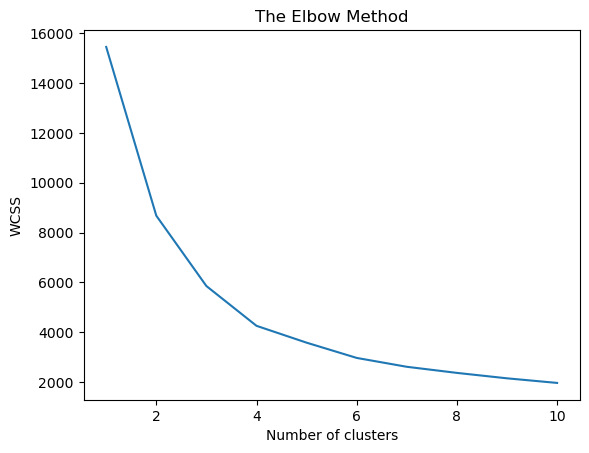

In [14]:
# K-Means Clustering
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df['vector'].tolist())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# K-Means Clustering using 3 clusters

kmeans = KMeans(n_clusters=3, random_state=0).fit(df['vector'].values.tolist())
kmeans.labels_

#input label to dataframe
df['label'] = kmeans.labels_
df.head()


/Users/akhmadramadani/Documents/TF/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,tweet,real_tweet,token,vector,label
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem...","[-0.4777812850661576, 0.731285504065454, 0.182...",2
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...","[-0.3680373860730065, 0.6005052402615547, 0.14...",2
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]","[-0.17908126286541423, 0.4448075814483066, 0.0...",1
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ...","[-0.34827083740383386, 0.5752464842051268, 0.1...",2
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...","[-0.25330586758043083, 0.40945335796901156, 0....",0


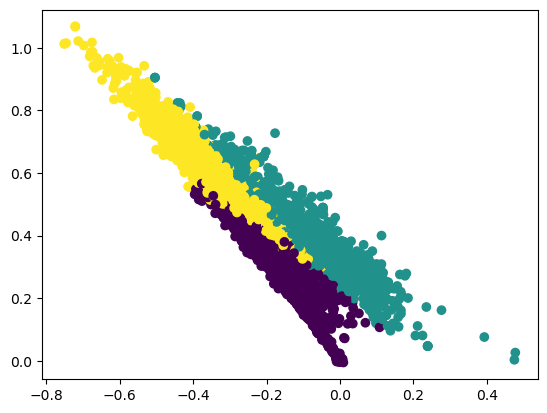

In [16]:
# plot vector to 2d plot
plt.scatter(df['vector'].apply(lambda x: x[0]), df['vector'].apply(lambda x: x[1]), c=kmeans.labels_)
plt.show()

In [17]:
# evaluate the model
from sklearn.metrics import silhouette_score
silhouette_score(df['vector'].values.tolist(), kmeans.labels_)


0.40004946079085346

In [18]:
# label rename
# 0 = negative
# 1 = neutral
# 2 = positive
df['label_text'] = df['label'].apply(lambda x: 'negative' if x == 0 else ('neutral' if x == 1 else 'positive'))
df.head()

,tweet,real_tweet,token,vector,label,label_text
0,semester studi independen magang yaa semester ...,[cm] smt 5 mending ikut studi independen dulu ...,"[semester, studi, independen, magang, yaa, sem...","[-0.4777812850661576, 0.731285504065454, 0.182...",2,positive
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...","[-0.3680373860730065, 0.6005052402615547, 0.14...",2,positive
2,iya tugas uas manja bantu kerjain,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[iya, tugas, uas, manja, bantu, kerjain]","[-0.17908126286541423, 0.4448075814483066, 0.0...",1,neutral
3,dosen praktikum kasih waktu temu kelas haru ka...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, kasih, waktu, temu, kelas, ...","[-0.34827083740383386, 0.5752464842051268, 0.1...",2,positive
4,alhamdulilah hidup kasi include kos kuliah jak...,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...","[-0.25330586758043083, 0.40945335796901156, 0....",0,negative


In [19]:
# save word2vec model
model.save('models/word2vec.model')

In [20]:
# # save result to csv
# df.to_csv('data/collegemenfess_cluster.csv', index=False)


In [21]:
# save the model
import pickle
pickle.dump(kmeans, open('models/kmeans.sav', 'wb'))


In [22]:
# load the model
kmeans = pickle.load(open('models/kmeans.sav', 'rb'))


In [23]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['real_tweet'], df['label_text'], test_size=0.2, random_state=42)

# model training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', SVC(kernel='linear')),
])

text_clf.fit(X_train, y_train)

# model evaluation
predictions = text_clf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

    negative       0.84      0.68      0.75       812
     neutral       0.89      0.78      0.83       249
    positive       0.73      0.88      0.80       906

    accuracy                           0.78      1967
   macro avg       0.82      0.78      0.79      1967
weighted avg       0.80      0.78      0.78      1967

[[549  13 250]
 [  9 195  45]
 [ 96  11 799]]
0.784443314692425


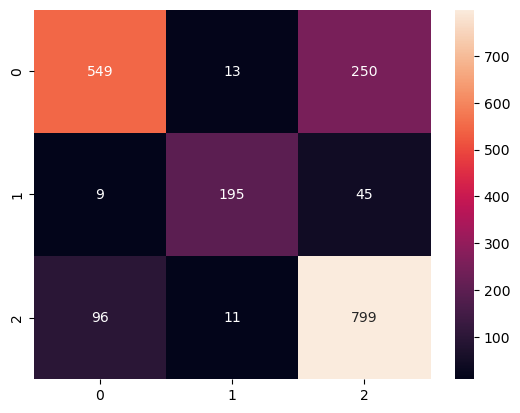

In [24]:
# plot the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [25]:
# save the model

pickle.dump(text_clf, open('models/svm.sav', 'wb'))


In [26]:
# load the model
text_clf = pickle.load(open('models/svm.sav', 'rb'))


In [27]:
# import twint
# import nest_asyncio

# nest_asyncio.apply()
# #
# # from collegemenfess get 500 latest tweet
# c = twint.Config()
# c.Username = "collegemenfess"
# c.Limit = 500
# c.Store_csv = True
# c.Output = "test.csv"
# twint.run.Search(c)


In [28]:
# load the data
test_data = pd.read_csv('test.csv')
test_data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608574820035465218,1608574820035465218,2022-12-30 04:24:57 WIB,2022-12-30,04:24:57,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608570538049536001,1608570538049536001,2022-12-30 04:07:56 WIB,2022-12-30,04:07:56,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608562874859020288,1608562874859020288,2022-12-30 03:37:29 WIB,2022-12-30,03:37:29,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608561019739336704,1608561019739336704,2022-12-30 03:30:07 WIB,2022-12-30,03:30:07,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608550643492618243,1608550643492618243,2022-12-30 02:48:53 WIB,2022-12-30,02:48:53,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [33]:
# predict the test_data using kmeans
def predict_label(tweet):
    tweet = func.cleanTxt(tweet)
    tweet = func.slang_to_formal(tweet)
    tweet = func.acronym_to_formal(tweet)
    tweet = func.removeStopWords(tweet)
    tweet = func.stemSentence(tweet)
    token = func.word_tokenize(tweet)
    vector = get_vector(token)
    label = kmeans.predict([vector])
    return {
        'tweet': tweet,
        'label': label[0]
        
    }

In [30]:
# predict the test_data using svm
def predict_label_svm(tweet):
    return text_clf.predict([tweet])[0]
    

In [37]:
# predict the test_data using kmeans
test_data['label'] = test_data['tweet'].apply(predict_label_svm)
test_data.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,label
0,1608574820035465218,1608574820035465218,2022-12-30 04:24:57 WIB,2022-12-30,04:24:57,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,positive
1,1608570538049536001,1608570538049536001,2022-12-30 04:07:56 WIB,2022-12-30,04:07:56,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,positive
2,1608562874859020288,1608562874859020288,2022-12-30 03:37:29 WIB,2022-12-30,03:37:29,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,negative
3,1608561019739336704,1608561019739336704,2022-12-30 03:30:07 WIB,2022-12-30,03:30:07,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,positive
4,1608550643492618243,1608550643492618243,2022-12-30 02:48:53 WIB,2022-12-30,02:48:53,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,neutral
